# E-Commerce and Retail B2B Case Study

## Problem Statement

Schuster is a multinational retail company dealing in sports goods and accessories. Schuster conducts significant business with hundreds of its vendors, with whom it has credit arrangements. Unfortunately, not all vendors respect credit terms and some of them tend to make payments late. Schuster levies heavy late payment fees, although this procedure is not beneficial to either party in a long-term business relationship. The company has some employees who keep chasing vendors to get the payment on time; this procedure nevertheless also results in non-value-added activities, loss of time and financial impact. Schuster would thus try to understand its customers’ payment behaviour and predict the likelihood of late payments against open invoices.

To understand how to approach this problem using data science, let’s first understand the payment process at Schuster now. Every time a transaction of goods takes place with a vendor, the accounting team raises an invoice and shares it with the vendor. This invoice contains the details of the goods, the invoice value, the creation date and the payment due date based on the credit terms as per the contract. Business with these vendors occurs quite frequently. Hence, there are always multiple invoices associated with each vendor at any given time.

## Business Objective
- Schuster would like to better understand the customers’ payment behaviour based on their past payment patterns (customer segmentation).
- Using historical information, it wants to be able to predict the likelihood of delayed payment against open invoices from its customers.
- It wants to use this information so that collectors can prioritise their work in following up with customers beforehand to get the payments on time.

In [1]:
# Importing required lbraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Reading and Understanding the data

In [2]:
# Reading the dataset
df_rec_pay_data = pd.read_csv("Received_Payments_Data.csv")

In [3]:
df_rec_pay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


###  Data Cleaning and Preparation

In [4]:
# Checking the shape of the data
df_rec_pay_data.shape

(93937, 16)

In [5]:
#Get the columns information
df_rec_pay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [6]:
# Check summary of all numerical columns to understand the statistical spread 
df_rec_pay_data.describe()

,CUSTOMER_NUMBER,RECEIPT_DOC_NO,Local Amount,USD Amount
count,93937.000000,9.390800e+04,9.393700e+04,9.393700e+04
mean,12753.874033,1.583908e+11,1.066470e+06,5.312013e+05
std,14274.170829,3.885359e+10,1.546901e+06,9.508693e+05
min,1044.000000,1.421000e+10,0.000000e+00,0.000000e+00
25%,1888.000000,1.470000e+11,8.198039e+04,3.766298e+04
50%,4003.000000,1.510000e+11,4.053438e+05,1.810010e+05
75%,20884.000000,1.690000e+11,1.425606e+06,5.996137e+05
max,52940.000000,2.970000e+11,1.084983e+07,1.084983e+07


In [7]:
# checking number of unique values in each column
df_rec_pay_data.nunique()

RECEIPT_METHOD               8
CUSTOMER_NAME              690
CUSTOMER_NUMBER           1054
RECEIPT_DOC_NO              73
RECEIPT_DATE               170
CLASS                        1
CURRENCY_CODE                8
Local Amount              7752
USD Amount                7820
INVOICE_ALLOCATED        12986
INVOICE_CREATION_DATE     1310
DUE_DATE                  1203
PAYMENT_TERM                42
INVOICE_CLASS                3
INVOICE_CURRENCY_CODE       10
INVOICE_TYPE                 2
dtype: int64

###  Handling Missing Values

In [8]:
#Checking for count of missing values in each column
round(df_rec_pay_data.isna().sum()/len(df_rec_pay_data.index),4)

RECEIPT_METHOD           0.0000
CUSTOMER_NAME            0.0000
CUSTOMER_NUMBER          0.0000
RECEIPT_DOC_NO           0.0003
RECEIPT_DATE             0.0000
CLASS                    0.0000
CURRENCY_CODE            0.0000
Local Amount             0.0000
USD Amount               0.0000
INVOICE_ALLOCATED        0.0000
INVOICE_CREATION_DATE    0.0000
DUE_DATE                 0.0000
PAYMENT_TERM             0.0000
INVOICE_CLASS            0.0000
INVOICE_CURRENCY_CODE    0.0000
INVOICE_TYPE             0.0000
dtype: float64

The "RECEIPT_DOC_NO" col has 0.03% null values. Dropping the columns as it is not important for model building.

In [9]:
# Dropping the "RECEIPT_DOC_NO" column
df_rec_pay_data.drop('RECEIPT_DOC_NO', axis=1, inplace=True)

# Checking the head of data again
df_rec_pay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


###  Handling Outliers

In [10]:
# Checking outliers at 25%,50%,75%,90%,95% and above
df_rec_pay_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,CUSTOMER_NUMBER,Local Amount,USD Amount
count,93937.000000,9.393700e+04,9.393700e+04
mean,12753.874033,1.066470e+06,5.312013e+05
std,14274.170829,1.546901e+06,9.508693e+05
min,1044.000000,0.000000e+00,0.000000e+00
25%,1888.000000,8.198039e+04,3.766298e+04
50%,4003.000000,4.053438e+05,1.810010e+05
75%,20884.000000,1.425606e+06,5.996137e+05
90%,36457.000000,3.298818e+06,1.257455e+06
95%,44178.400000,4.618005e+06,2.101629e+06
99%,49584.000000,7.075863e+06,5.814128e+06


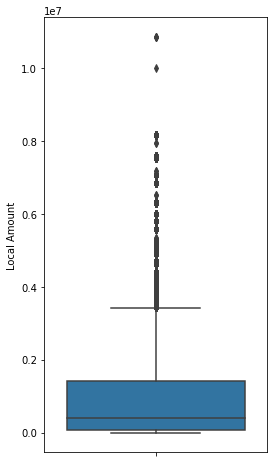

In [11]:
##plot box plot of Local Amount column to check if any outlier is present
plt.figure(figsize = (4,8))
sns.boxplot( y=df_rec_pay_data['Local Amount'])
plt.show()

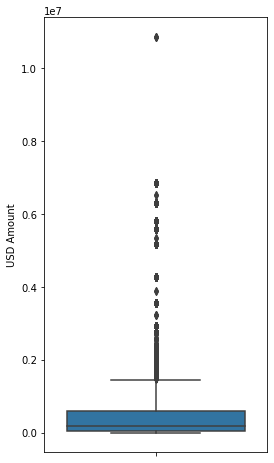

In [12]:

##plot box plot of Local Amount column to check if any outlier is present
plt.figure(figsize = (4,8))
sns.boxplot( y=df_rec_pay_data['USD Amount'])
plt.show()


In [13]:
# Removing values beyond 99% for page Views TotalVisits
TotalAmount_quartile_99 = df_rec_pay_data['Local Amount'].quantile(0.99)
df_rec_pay_data = df_rec_pay_data[df_rec_pay_data["Local Amount"] < TotalAmount_quartile_99]
df_rec_pay_data["Local Amount"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9.282600e+04
mean     9.886207e+05
std      1.381143e+06
min      0.000000e+00
25%      8.062728e+04
50%      3.988022e+05
75%      1.294533e+06
90%      3.034583e+06
95%      4.249746e+06
99%      5.814128e+06
max      6.836736e+06
Name: Local Amount, dtype: float64

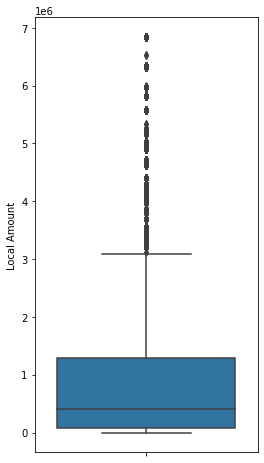

In [14]:
##plot box plot of Local Amount column to check if any outlier is present
plt.figure(figsize = (4,8))
sns.boxplot( y=df_rec_pay_data['Local Amount'])
plt.show()

In [15]:
# Removing values beyond 99% for page Views TotalVisits
TotalAmount_quartile_99 = df_rec_pay_data['USD Amount'].quantile(0.99)
df_rec_pay_data = df_rec_pay_data[df_rec_pay_data["USD Amount"] < TotalAmount_quartile_99]
df_rec_pay_data["USD Amount"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9.173900e+04
mean     4.448874e+05
std      7.055042e+05
min      0.000000e+00
25%      3.610266e+04
50%      1.675171e+05
75%      5.900000e+05
90%      1.113644e+06
95%      1.802273e+06
99%      3.561922e+06
max      5.582546e+06
Name: USD Amount, dtype: float64

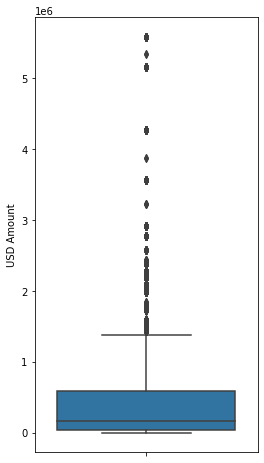

In [16]:

##plot box plot of Local Amount column to check if any outlier is present
plt.figure(figsize = (4,8))
sns.boxplot( y=df_rec_pay_data['USD Amount'])
plt.show()

In [17]:
# Checking outliers again at 25%,50%,75%,90%,95% and above
df_rec_pay_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,CUSTOMER_NUMBER,Local Amount,USD Amount
count,91739.000000,9.173900e+04,9.173900e+04
mean,12790.644655,9.263675e+05,4.448874e+05
std,14405.762950,1.263819e+06,7.055042e+05
min,1044.000000,0.000000e+00,0.000000e+00
25%,1888.000000,7.991842e+04,3.610266e+04
50%,3997.000000,3.755132e+05,1.675171e+05
75%,20959.000000,1.224990e+06,5.900000e+05
90%,37398.000000,2.912826e+06,1.113644e+06
95%,44540.000000,3.794467e+06,1.802273e+06
99%,49584.000000,5.029646e+06,3.561922e+06


###  Data Cleaning

In [18]:
# Changing the date related columns to pandas datatime object

df_rec_pay_data['RECEIPT_DATE'] = pd.to_datetime(df_rec_pay_data['RECEIPT_DATE'])
df_rec_pay_data['INVOICE_CREATION_DATE'] = pd.to_datetime(df_rec_pay_data['INVOICE_CREATION_DATE'])
df_rec_pay_data['DUE_DATE'] = pd.to_datetime(df_rec_pay_data['DUE_DATE'])

In [19]:
df_rec_pay_data.info() # Sanity check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91739 entries, 0 to 93936
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         91739 non-null  object        
 1   CUSTOMER_NAME          91739 non-null  object        
 2   CUSTOMER_NUMBER        91739 non-null  int64         
 3   RECEIPT_DATE           91739 non-null  datetime64[ns]
 4   CLASS                  91739 non-null  object        
 5   CURRENCY_CODE          91739 non-null  object        
 6   Local Amount           91739 non-null  float64       
 7   USD Amount             91739 non-null  float64       
 8   INVOICE_ALLOCATED      91739 non-null  object        
 9   INVOICE_CREATION_DATE  91739 non-null  datetime64[ns]
 10  DUE_DATE               91739 non-null  datetime64[ns]
 11  PAYMENT_TERM           91739 non-null  object        
 12  INVOICE_CLASS          91739 non-null  object        
 13  I

In [20]:
# Using boolean values and converting them into integer to create the target column 
df_rec_pay_data['target'] = (df_rec_pay_data["RECEIPT_DATE"] > df_rec_pay_data["DUE_DATE"]).astype(int)

In [21]:
# Checking the count of targeted bill payments
df_rec_pay_data.target.value_counts()

1    60515
0    31224
Name: target, dtype: int64

In [22]:
# Checking the percentage of defaulted bill payments
df_rec_pay_data.target.value_counts(normalize=True)

1    0.659643
0    0.340357
Name: target, dtype: float64

##  Exploratory Data Analysis

In [23]:
# Categorical Columns
cat_cols= ['CUSTOMER_NAME','CLASS','CURRENCY_CODE','PAYMENT_TERM','INVOICE_CLASS',
           'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE','RECEIPT_METHOD']

# Numerical Columns
num_cols= ['Local Amount', 'USD Amount']

#date Cols
date_cols= ['RECEIPT_DATE','INVOICE_CREATION_DATE','DUE_DATE']


###  Univariate Analysis

#### Numeric Columns

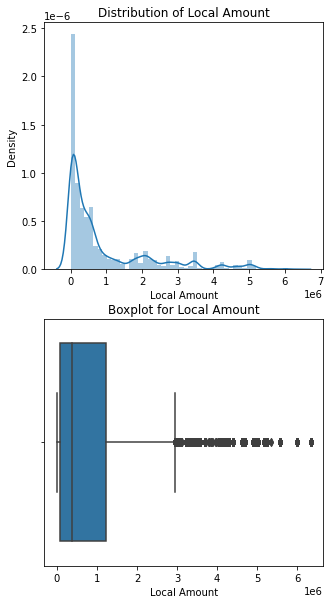

In [24]:
# Visualizing the distribution of local amount column

plt.figure(figsize= (5,10))
plt.subplot(2,1,1)
sns.distplot(df_rec_pay_data['Local Amount'])
plt.title('Distribution of Local Amount')
plt.subplot(2,1,2)
sns.boxplot(df_rec_pay_data['Local Amount'])
plt.title('Boxplot for Local Amount')
plt.show()

In [25]:
# Checking the number of bills with Local Amount equal to 0
df_rec_pay_data[df_rec_pay_data['Local Amount'] == 0].shape

(1126, 16)

1126 bills have amount equal to 0, hence dropping these rows.

In [26]:
# Dropping the rows with 'Local Amount' = 0
df_rec_pay_data = df_rec_pay_data[df_rec_pay_data['Local Amount'] > 0]

# Checking the shape again
df_rec_pay_data.shape

(90613, 16)

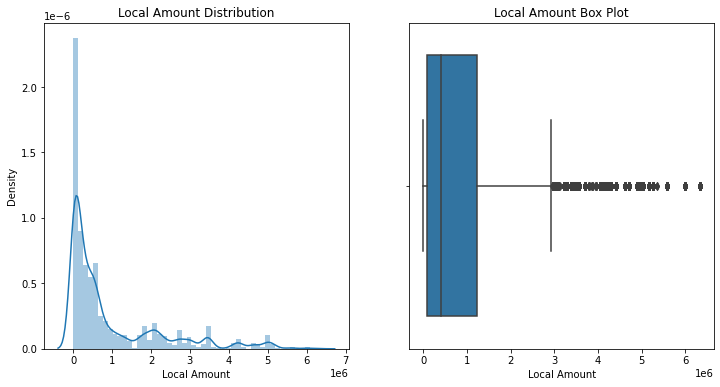

In [27]:
# Visualizing the distribution of 'Local Amount' column again

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(df_rec_pay_data['Local Amount'])
plt.title("Local Amount Distribution")

plt.subplot(1,2,2)
sns.boxplot(df_rec_pay_data['Local Amount'])
plt.title("Local Amount Box Plot")

plt.show()

- Dropping the 'Local Amount' column as it does not have a single currency value and we already have 'USD Amount' column for bill amount.

In [28]:
# Dropping the 'Local Amount' column
df_rec_pay_data.drop('Local Amount', axis=1, inplace=True)

# Checking the head of data
df_rec_pay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,target
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1


In [29]:
# 'USD Amount' column summary
df_rec_pay_data['USD Amount'].describe().round()

count      90613.0
mean      450416.0
std       708118.0
min            1.0
25%        38709.0
50%       174819.0
75%       591964.0
max      5582546.0
Name: USD Amount, dtype: float64

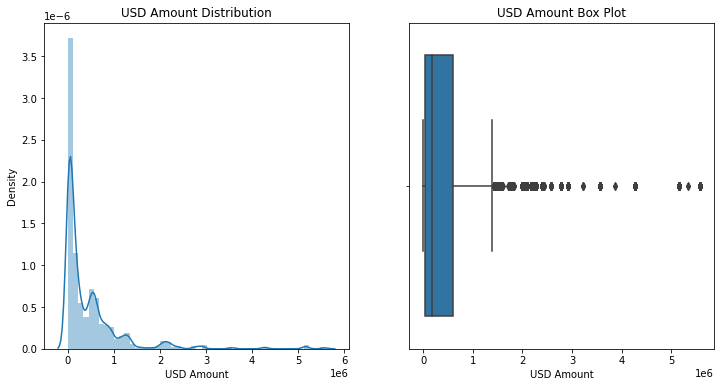

In [30]:
# Visualizing the distribution of 'USD Amount' column

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(df_rec_pay_data['USD Amount'])
plt.title("USD Amount Distribution")

plt.subplot(1,2,2)
sns.boxplot(df_rec_pay_data['USD Amount'])
plt.title("USD Amount Box Plot")

plt.show()

#### Categorical Columns

In [31]:
# Finding the number of Unique customer names
df_rec_pay_data['CUSTOMER_NAME'].nunique()

689

In [32]:
# Top10 - FREQUENCY
# Top 10 customers on the basis of frequency of invoices
df_rec_pay_data['CUSTOMER_NAME'].value_counts().head(10)

SEPH Corp    21019
FARO Corp    14868
PARF Corp     6624
ALLI Corp     5645
AREE Corp     2224
DEBE Corp     2133
RADW Corp     1645
YOUG Corp     1480
HABC Corp     1402
CARR Corp      952
Name: CUSTOMER_NAME, dtype: int64

In [33]:
# Top10 - AMOUNT
# Top 10 customers on the basis of invoice amounts in USD.
with pd.option_context('display.float_format', lambda x: f'{x:,.3f}'):
    display(df_rec_pay_data.groupby('CUSTOMER_NAME').sum()['USD Amount'].round(0).sort_values(ascending= False).head(10))

CUSTOMER_NAME
SEPH Corp   23,765,572,613.000
FARO Corp    5,493,408,190.000
PARF Corp    3,200,510,261.000
ALLI Corp    2,580,740,593.000
AREE Corp    1,125,144,489.000
HABC Corp      534,321,619.000
RADW Corp      358,403,113.000
L OR Corp      295,550,941.000
CGR  Corp      279,516,184.000
PCD  Corp      246,606,985.000
Name: USD Amount, dtype: float64

In [34]:
# Class
# Number of Unique Classes
df_rec_pay_data['CLASS'].nunique()

1

In [35]:
# Dropping the CLASS column as it has only one value
df_rec_pay_data.drop('CLASS', axis=1, inplace=True)

In [36]:
# Currency Code
# Number of Unique Currency Codes
df_rec_pay_data['CURRENCY_CODE'].nunique()

8

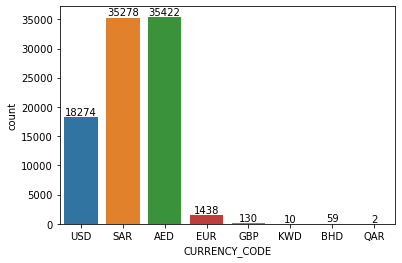

In [37]:
# Visualising the Currency column
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df_rec_pay_data, x='CURRENCY_CODE')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

Currency used for bill payments are mostly USD, SAR or AED.

In [38]:
# Payment Term
# Number of unique values in Payment Term
df_rec_pay_data['PAYMENT_TERM'].nunique()

42

In [39]:
# Finding top 10 payment term against frequency
df_rec_pay_data['PAYMENT_TERM'].value_counts().head(10)

60 Days from Inv Date    18885
30 Days from Inv Date    14022
60 Days from EOM         11926
30 Days from EOM         11298
15 Days from EOM          7426
Immediate                 4925
Immediate Payment         4879
90 Days from EOM          3893
45 Days from Inv Date     3545
45 Days from EOM          3490
Name: PAYMENT_TERM, dtype: int64

In [40]:
# INVOICE_CLASS
# Number of Unique items in invoice class
df_rec_pay_data['INVOICE_CLASS'].nunique()

3

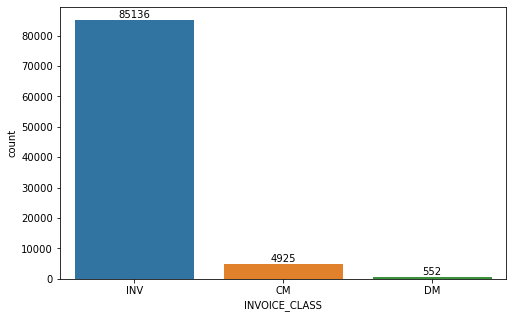

In [41]:
# Visualising the INVOICE_CLASS column
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_rec_pay_data, x='INVOICE_CLASS')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

- INV has the maximum number of bills in INVOICE_CLASS column.

In [42]:
# Invoice Currency Code
# Checking the number of unique values
df_rec_pay_data['INVOICE_CURRENCY_CODE'].nunique()

10

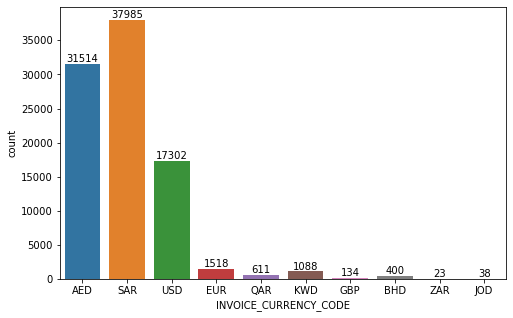

In [43]:
# Visualising the INVOICE_CURRENCY_CODE column
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_rec_pay_data, x='INVOICE_CURRENCY_CODE')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [44]:
# Invoice Type
# Number of unique values in invoice types
df_rec_pay_data['INVOICE_TYPE'].nunique()

2

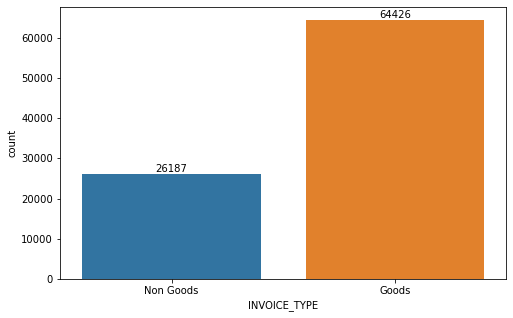

In [45]:
# Visualising the INVOICE_TYPE column
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_rec_pay_data, x='INVOICE_TYPE')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [46]:
# Checking the value count of each level of INVOICE_TYPE
df_rec_pay_data['INVOICE_TYPE'].value_counts(normalize = True)

Goods        0.711002
Non Goods    0.288998
Name: INVOICE_TYPE, dtype: float64

- Almost 70% of the invoices generated were for Goods products.

In [47]:
# Receipt Method
# number of unique values in receipt method

df_rec_pay_data['RECEIPT_METHOD'].nunique()

8

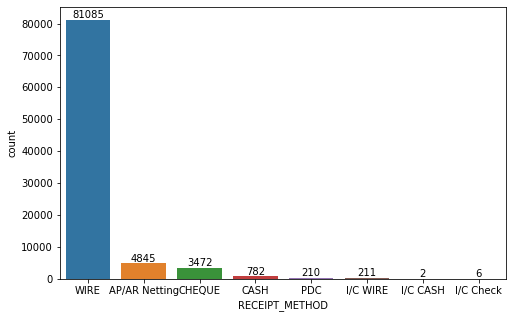

In [48]:
# Visualising the RECEIPT_METHOD column
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_rec_pay_data, x='RECEIPT_METHOD')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

- The most preferred payment method for bill payment is WIRE.

### Data Imbalance

In [49]:
# Checking the percentage of defaulted/target bill payments
df_rec_pay_data.target.value_counts(normalize=True)

1    0.656308
0    0.343692
Name: target, dtype: float64

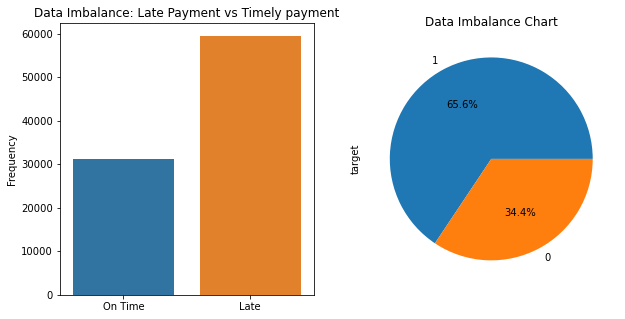

In [50]:
# ploting the target column
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='target', data=df_rec_pay_data)

plt.title("Data Imbalance: Late Payment vs Timely payment")
plt.xlabel("")
plt.ylabel("Frequency")
plt.xticks((0,1), ('On Time', 'Late'))

plt.subplot(1,2,2)
#data imbalance chart
(df_rec_pay_data.target.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Data Imbalance Chart")

plt.show()

###  Bivariate Analysis

In [51]:
# Extracting month from the date columns

df_rec_pay_data['month_reciept'] = df_rec_pay_data['RECEIPT_DATE'].dt.month
df_rec_pay_data['month_inv_creation'] = df_rec_pay_data['INVOICE_CREATION_DATE'].dt.month
df_rec_pay_data['month_due'] = df_rec_pay_data['DUE_DATE'].dt.month

In [52]:
# Month-wise invoices due

orders_due_month = df_rec_pay_data.groupby('month_due').count()['DUE_DATE']
orders_due_month

month_due
1     13141
2     12673
3     14479
4     13910
5     12285
6     10385
7      1523
8      1073
9       910
10     1479
11     2723
12     6032
Name: DUE_DATE, dtype: int64

In [53]:
# Effect of monthly due on late payment rate

# Creating a pivot table to see the effects of different months on percentage of late payments
late_dues = df_rec_pay_data.groupby('month_due').mean()['target']
late_dues.sort_index(ascending= True)

month_due
1     0.712807
2     0.685552
3     0.618068
4     0.616607
5     0.577696
6     0.411074
7     0.363099
8     0.793103
9     0.974725
10    0.999324
11    1.000000
12    0.999834
Name: target, dtype: float64

In [54]:
# effects of month in which payment is due on late payment rate

dues_late = df_rec_pay_data.groupby('month_due').mean()['target'] # Creating a pivot table to see the effects of different months on percentage of late payments
dues_late.sort_index(ascending= True)

month_due
1     0.712807
2     0.685552
3     0.618068
4     0.616607
5     0.577696
6     0.411074
7     0.363099
8     0.793103
9     0.974725
10    0.999324
11    1.000000
12    0.999834
Name: target, dtype: float64

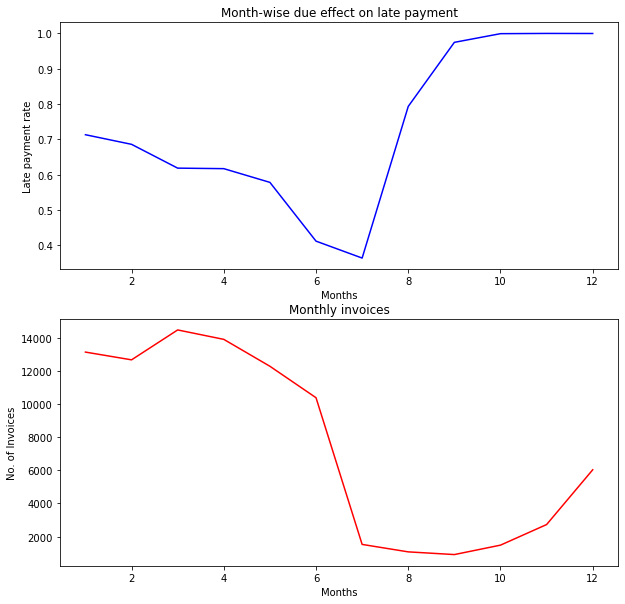

In [55]:
# Visualising the effect of month on late payment rate

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(late_dues, color='blue')
plt.title("Month-wise due effect on late payment")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

plt.subplot(2,1,2)
plt.plot(orders_due_month, color='red')
plt.title("Monthly invoices")
plt.xlabel("Months")
plt.ylabel("No. of Invoices")

plt.show()

- For the 3rd month, the number of invoices is the highest and late payment rate is comparatively lower than other months with large number of invoices.
- Month 7 has the very low late payment rate, this can be because of the fact that the number of invoices is also low.
- In the 2nd half of the year, the late payment increases steeply from 7th month onwards. The number of invoices are comparatively lower than the first half of the year.

In [56]:
# Receipt_date

order_month_receipt = df_rec_pay_data.groupby('month_reciept').count()['DUE_DATE']  # number of payments received in a month

# out of all the payments received in month how many were late payments
monthly_receipt = df_rec_pay_data.groupby('month_due').mean()['target']

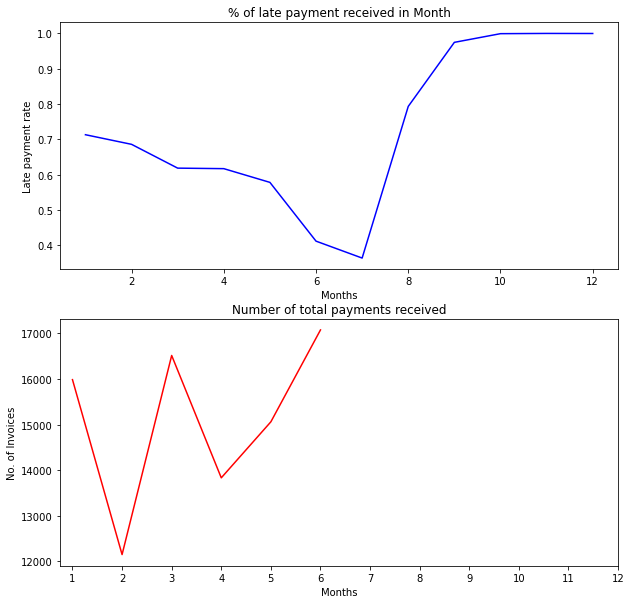

In [57]:
# Visualizing the effect of month in which the invoice is due, on the late payment rate
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(monthly_receipt, color='blue')
plt.title("% of late payment received in Month")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

plt.subplot(2,1,2)
plt.plot(order_month_receipt, color='red')
plt.title("Number of total payments received")
plt.xticks([i for i in range(1,13,1)])
plt.xlabel("Months")
plt.ylabel("No. of Invoices")

plt.show()

- No payment received against any invoices from 7th month onwards.

In [58]:
# invoice creation date

orders_month_created = df_rec_pay_data.groupby('month_inv_creation').count()['DUE_DATE'] 

month_created = df_rec_pay_data.groupby('month_inv_creation').mean()['target'] 

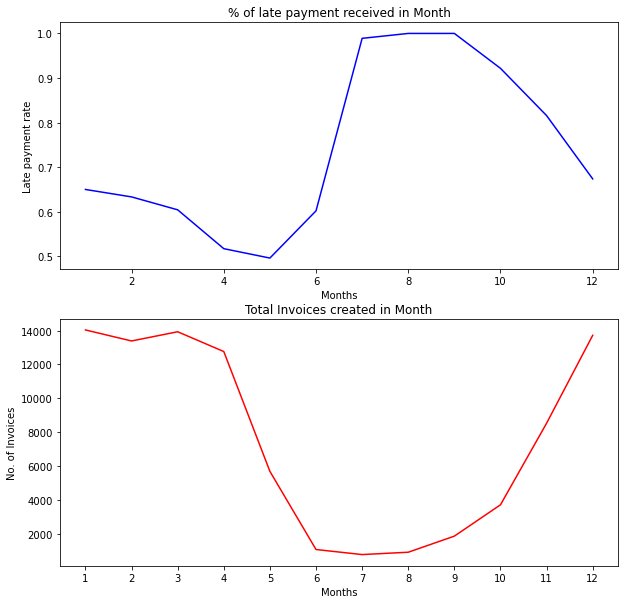

In [59]:
# Visualizing the effect of months in which the invoice is due, on the late payment rate
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(month_created, color='blue')
plt.title("% of late payment received in Month")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

plt.subplot(2,1,2)
plt.plot(orders_month_created, color='red')
plt.title("Total Invoices created in Month")
plt.xticks([i for i in range(1,13,1)])
plt.xlabel("Months")
plt.ylabel("No. of Invoices")

plt.show()

- Late payment rate is decreases from 1st to 5th month.
- For the months 7, 8 and 9, the late payment rate is very high.

In [60]:
# USD Amount

usd_amount_to_late = df_rec_pay_data.pivot_table(index= 'target', values= 'USD Amount', aggfunc= ['mean','median',np.std]).reset_index()
usd_amount_to_late

,target,mean,median,std
,,USD Amount,USD Amount,USD Amount
0,0,533075.339750,215061.65,826686.097262
1,1,407129.032186,150569.25,633001.935619


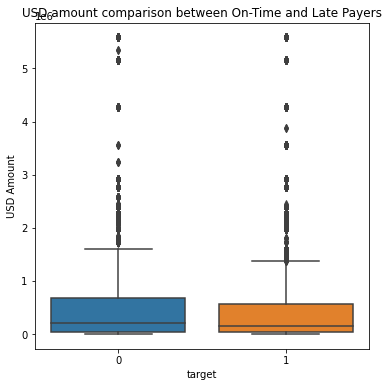

In [61]:
plt.figure(figsize=(6,6))

sns.boxplot(y = 'USD Amount', x='target', data = df_rec_pay_data)
plt.title("USD amount comparison between On-Time and Late Payers")

plt.show()

In [62]:
# Customer Name

customer_num_of_orders= df_rec_pay_data.groupby('CUSTOMER_NAME').count()['target'].sort_values(ascending= False).reset_index()
customer_num_of_orders_late= df_rec_pay_data.groupby('CUSTOMER_NAME').mean()['target'].sort_values(ascending= False).reset_index()

In [63]:
# Finding the important customers (customers with more than 500 orders)

imp_cust = customer_num_of_orders[customer_num_of_orders['target'] > 500]['CUSTOMER_NAME']
imp_cust

0     SEPH Corp
1     FARO Corp
2     PARF Corp
3     ALLI Corp
4     AREE Corp
5     DEBE Corp
6     RADW Corp
7     YOUG Corp
8     HABC Corp
9     CARR Corp
10    AL T Corp
11    VAVA Corp
12    CGR  Corp
13    REAL Corp
14    PARI Corp
15    ARAB Corp
16    LIFE Corp
17    AL S Corp
18    MCT  Corp
19    CWF  Corp
20    AL F Corp
21    CHRI Corp
Name: CUSTOMER_NAME, dtype: object

In [64]:
# Checking only important customers late payment rate

imp_cust_late = customer_num_of_orders_late[customer_num_of_orders_late['CUSTOMER_NAME'].isin(imp_cust)]
imp_cust_late

,CUSTOMER_NAME,target
201,YOUG Corp,1.000000
246,VAVA Corp,0.937873
256,AL T Corp,0.917241
273,LIFE Corp,0.899522
287,PARI Corp,0.876153
306,PARF Corp,0.847222
308,AL S Corp,0.842788
341,CHRI Corp,0.787276
342,CARR Corp,0.786765
380,HABC Corp,0.726106


In [65]:
# Invoice Class

invoice_class_late= df_rec_pay_data.groupby('INVOICE_CLASS').mean()['target']
invoice_class_late

INVOICE_CLASS
CM     0.976853
DM     0.884058
INV    0.636288
Name: target, dtype: float64

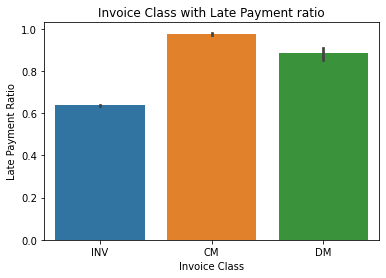

In [66]:
# Visualising the late payment ratio of each invoice class

sns.barplot(data=df_rec_pay_data, x='INVOICE_CLASS', y='target', estimator=np.mean)
plt.title("Invoice Class with Late Payment ratio")
plt.xlabel("Invoice Class")
plt.ylabel("Late Payment Ratio")
plt.show()

- Late payment ratio is very high for CM and lowest for INV INVOICE_CLASS.

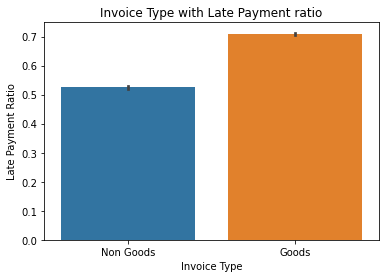

In [67]:
# Visualising the late payment ratio of each Invoice Type
plt.figure(figsize=(6,4))

sns.barplot(data=df_rec_pay_data, x='INVOICE_TYPE', y='target', estimator=np.mean)
plt.title("Invoice Type with Late Payment ratio")
plt.xlabel("Invoice Type")
plt.ylabel("Late Payment Ratio")
plt.show()

- Late payment ratio for Goods is higher than Non-Goods.

##  Feature Engineering

In [68]:
# Using cumsum() function to get cummulative sum on value_counts()

pay_term_cumsum = df_rec_pay_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

60 Days from Inv Date                                      0.208414
30 Days from Inv Date                                      0.363160
60 Days from EOM                                           0.494774
30 Days from EOM                                           0.619459
15 Days from EOM                                           0.701411
Immediate                                                  0.755764
Immediate Payment                                          0.809608
90 Days from EOM                                           0.852571
45 Days from Inv Date                                      0.891693
45 Days from EOM                                           0.930209
90 Days from Inv Date                                      0.954609
100% Adv Payment                                           0.968216
25 DAYS FROM EOM                                           0.973315
Cash on Delivery                                           0.977928
15 Days from Inv Date                           

In [69]:
# Both Immediate and Immediate payment are same, hence replacing with Immediate Payment

df_rec_pay_data['PAYMENT_TERM'] = df_rec_pay_data['PAYMENT_TERM'].replace('Immediate', 'Immediate Payment')

# 45 Days from EOM and 45 DAYS + EOM are giving same information, hence using 45 Days from EOM
df_rec_pay_data['PAYMENT_TERM'] = df_rec_pay_data['PAYMENT_TERM'].replace('45 DAYS + EOM', '45 Days from EOM')

pay_term_cumsum = df_rec_pay_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
pay_term_cumsum

60 Days from Inv Date                                      0.208414
30 Days from Inv Date                                      0.363160
60 Days from EOM                                           0.494774
30 Days from EOM                                           0.619459
Immediate Payment                                          0.727655
15 Days from EOM                                           0.809608
90 Days from EOM                                           0.852571
45 Days from EOM                                           0.894596
45 Days from Inv Date                                      0.933718
90 Days from Inv Date                                      0.958119
100% Adv Payment                                           0.971726
25 DAYS FROM EOM                                           0.976825
Cash on Delivery                                           0.981438
15 Days from Inv Date                                      0.985366
On Consignment                                  

- As it can be seen, around 95% of data is covered by 10 values, hence we will club the rest of the values to others in both datasets.

In [70]:
# Top 10 values to keep
vals_to_keep= pay_term_cumsum.index[:10]

# Clubbing the rest values to others
df_rec_pay_data['PAYMENT_TERM'] = df_rec_pay_data['PAYMENT_TERM'].apply(lambda x : x if x in vals_to_keep else 'others')

df_rec_pay_data['PAYMENT_TERM'].value_counts() # Sanity Check

60 Days from Inv Date    18885
30 Days from Inv Date    14022
60 Days from EOM         11926
30 Days from EOM         11298
Immediate Payment         9804
15 Days from EOM          7426
90 Days from EOM          3893
45 Days from EOM          3808
others                    3795
45 Days from Inv Date     3545
90 Days from Inv Date     2211
Name: PAYMENT_TERM, dtype: int64

#### Dummy Variable

In [71]:
# Creating dummy variables for the 'PAYMENT_TERM' column

term_dummies= pd.get_dummies(df_rec_pay_data['PAYMENT_TERM']).drop('others', axis=1)

df_rec_pay_data = df_rec_pay_data.join(term_dummies).drop('PAYMENT_TERM', axis=1 )
df_rec_pay_data.shape # Sanity Check

(90613, 26)

In [72]:
# Creating dummy variables for the 'INVOICE_CLASS' column

class_dummies= pd.get_dummies(df_rec_pay_data['INVOICE_CLASS'], drop_first=True)
class_dummies
df_rec_pay_data = df_rec_pay_data.join(class_dummies).drop('INVOICE_CLASS', axis=1 )

In [73]:
df_rec_pay_data.shape

(90613, 27)

In [74]:
df_rec_pay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CURRENCY_CODE,...,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.63040,14200000001,2020-11-02,2020-12-30,AED,...,0,0,0,0,0,0,0,0,0,1
1,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.21133,99200000043,2020-12-29,2021-01-28,SAR,...,1,0,0,0,0,0,0,0,0,1
2,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99210000003,2021-01-30,2021-03-01,SAR,...,1,0,0,0,0,0,0,0,0,1
3,WIRE,FARO Corp,1409,2021-01-31,SAR,41991.60971,99200000038,2020-12-15,2021-01-14,SAR,...,1,0,0,0,0,0,0,0,0,1
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.60971,99200000039,2020-12-15,2021-01-14,SAR,...,1,0,0,0,0,0,0,0,0,1


## Open Invoice Data

### Reading and understanding the data

In [75]:
# Reading the open invoice dataset
df_open_inv_data = pd.read_csv("Open_Invoice_data.csv", encoding='latin1')
df_open_inv_data.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [76]:
df_open_inv_data.shape

(88204, 14)

In [77]:
# Removing unecessary columns (that are not there in the receiced payment dataset)
# Dropping 'Transaction Number','Customer Account No' as they bear no significance for our target var.
# Dropping 'Local amount'

df_open_inv_data.drop(['AS_OF_DATE','Customer Type','Transaction Date','Transaction Currency','Transaction Number',
              'Customer Account No','Local Amount'], axis= 1, inplace= True)

In [78]:
# Checking the shape of the data again
df_open_inv_data.shape

(88204, 7)

In [79]:
# Checking the head
df_open_inv_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,21/12/2021,CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,AL J Corp,30 Days from Inv Date,03/03/2022,INVOICE,33,"2,000",2/1/2022 14:09
2,AL J Corp,30 Days from Inv Date,23/04/2022,INVOICE,-18,"2,000",3/24/2022 17:46
3,AL R Corp,15 Days from Inv Date,19/01/2022,INVOICE,76,"2,415",1/5/2022 11:49
4,ALLI Corp,30 Days from EOM,30/04/2022,INVOICE,-25,"3,800",3/3/2022 22:30


In [80]:
# Checking the info of the data
df_open_inv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_Name      88204 non-null  object
 1   Payment Term       88204 non-null  object
 2   Due Date           88204 non-null  object
 3   Transaction Class  88204 non-null  object
 4   AGE                88204 non-null  int64 
 5   USD Amount         88204 non-null  object
 6   INV_CREATION_DATE  88204 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.7+ MB


In [81]:
# Checking for null values
df_open_inv_data.isnull().sum()

Customer_Name        0
Payment Term         0
Due Date             0
Transaction Class    0
AGE                  0
USD Amount           0
INV_CREATION_DATE    0
dtype: int64

- No null values present in the dataset.

In [82]:
# Changing the format of 'Due Date' and 'INV_CREATION_DATE' to pandas datetime
df_open_inv_data['Due Date'] = pd.to_datetime(df_open_inv_data['Due Date'])
df_open_inv_data['INV_CREATION_DATE'] = pd.to_datetime(df_open_inv_data['INV_CREATION_DATE'])

In [83]:
df_open_inv_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,2021-12-21,CREDIT NOTE,105,"-3,088",2021-12-21 12:53:00
1,AL J Corp,30 Days from Inv Date,2022-03-03,INVOICE,33,"2,000",2022-02-01 14:09:00
2,AL J Corp,30 Days from Inv Date,2022-04-23,INVOICE,-18,"2,000",2022-03-24 17:46:00
3,AL R Corp,15 Days from Inv Date,2022-01-19,INVOICE,76,"2,415",2022-01-05 11:49:00
4,ALLI Corp,30 Days from EOM,2022-04-30,INVOICE,-25,"3,800",2022-03-03 22:30:00


In [84]:
# Changing the datatype of USD Amount
df_open_inv_data['USD Amount'] = df_open_inv_data['USD Amount'].apply(lambda x: x.replace(",", ""))
df_open_inv_data['USD Amount'] = df_open_inv_data['USD Amount'].astype(int)

In [85]:
# Checking the USD Amount column again
df_open_inv_data['USD Amount']

0        -3088
1         2000
2         2000
3         2415
4         3800
         ...  
88199    -1199
88200     -914
88201    12866
88202    18118
88203    18499
Name: USD Amount, Length: 88204, dtype: int32

In [86]:
# Removing negative values
df_open_inv_data = df_open_inv_data[df_open_inv_data['USD Amount'] > 0]

In [87]:
# Checking the info of the data set
df_open_inv_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79516 entries, 1 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_Name      79516 non-null  object        
 1   Payment Term       79516 non-null  object        
 2   Due Date           79516 non-null  datetime64[ns]
 3   Transaction Class  79516 non-null  object        
 4   AGE                79516 non-null  int64         
 5   USD Amount         79516 non-null  int32         
 6   INV_CREATION_DATE  79516 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(3)
memory usage: 4.5+ MB


### Feature Engineering

In [88]:
# Keeping the same levels as done in recieved payment dataset
df_open_inv_data['Payment Term'] = df_open_inv_data['Payment Term'].apply(lambda x: x if x in vals_to_keep else 'others')

df_open_inv_data['Payment Term'].value_counts()

30 Days from Inv Date    18328
60 Days from Inv Date    17599
Immediate Payment        16202
60 Days from EOM          8170
others                    5385
30 Days from EOM          5324
90 Days from EOM          2595
90 Days from Inv Date     2429
45 Days from Inv Date     1533
15 Days from EOM          1097
45 Days from EOM           854
Name: Payment Term, dtype: int64

In [89]:
# Creating dummy variables for the column
term_dummies_open = pd.get_dummies(df_open_inv_data['Payment Term']).drop('others', axis=1)

# Merging the dummies dataframe into open_data and removing the 'Payment Term' column
df_open_inv_data = df_open_inv_data.join(term_dummies_open).drop('Payment Term', axis=1)
df_open_inv_data.head()

,Customer_Name,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
1,AL J Corp,2022-03-03,INVOICE,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0
2,AL J Corp,2022-04-23,INVOICE,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0
3,AL R Corp,2022-01-19,INVOICE,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0
4,ALLI Corp,2022-04-30,INVOICE,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0
5,ALLI Corp,2022-04-30,INVOICE,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0


In [90]:
# Checking the levels in the column
df_open_inv_data['Transaction Class'].value_counts()

INVOICE       78251
DEBIT NOTE     1265
Name: Transaction Class, dtype: int64

In [91]:
# Replacing INVOICE with INV and DEBIT NOTE WITH DM
df_open_inv_data['Transaction Class'] = df_open_inv_data['Transaction Class'].map(lambda x: 'INV' if x=='INVOICE' else 'DM')

In [92]:
# Creating dummy variables for the column
tc = pd.get_dummies(df_open_inv_data['Transaction Class'])

# Adding the dummy variables to main dataset and dropping the Transaction Class column
df_open_inv_data = df_open_inv_data.join(tc).drop('Transaction Class', axis=1)


##### Checking columns in received payment dataset and open invoice dataset 

In [93]:
df_rec_pay_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'target', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV'],
      dtype='object')

In [94]:
df_open_inv_data.columns

Index(['Customer_Name', 'Due Date', 'AGE', 'USD Amount', 'INV_CREATION_DATE',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'DM', 'INV'],
      dtype='object')

In [95]:
# Creating a new column to show actual number of days taken to make the payment after invoice generation
df_rec_pay_data['act_days_for_pay'] = (df_rec_pay_data['RECEIPT_DATE']-df_rec_pay_data['INVOICE_CREATION_DATE']).dt.days

In [96]:
# Calculating customer wise average days for payment
cust_seg1= df_rec_pay_data.groupby('CUSTOMER_NAME')['act_days_for_pay'].mean()
cust_seg1 = cust_seg1.to_frame()
cust_seg1.reset_index
cust_seg1.rename(columns={'act_days_for_pay': 'Avg days for payment'}, inplace=True)
cust_seg1.head()

,Avg days for payment
CUSTOMER_NAME,
3D D Corp,24.395349
6TH Corp,40.666667
A3 D Corp,45.400000
ABC Corp,16.000000
ABDU Corp,76.906250


In [97]:
# Calculating the standard deviation for customer wise payment days
cust_seg2 = df_rec_pay_data.groupby('CUSTOMER_NAME')['act_days_for_pay'].std()
cust_seg2 = cust_seg2.to_frame()
cust_seg2.reset_index
cust_seg2.rename(columns={'act_days_for_pay': 'Std deviation for payment'}, inplace=True)
cust_seg2.head()

,Std deviation for payment
CUSTOMER_NAME,
3D D Corp,13.040449
6TH Corp,7.952987
A3 D Corp,52.581366
ABC Corp,0.000000
ABDU Corp,54.919326


In [98]:
# Merging the above two dataframes
cust_seg = pd.merge(cust_seg1, cust_seg2, how='inner', on='CUSTOMER_NAME')

# Checking the head
cust_seg.head()

,Avg days for payment,Std deviation for payment
CUSTOMER_NAME,,
3D D Corp,24.395349,13.040449
6TH Corp,40.666667,7.952987
A3 D Corp,45.400000,52.581366
ABC Corp,16.000000,0.000000
ABDU Corp,76.906250,54.919326


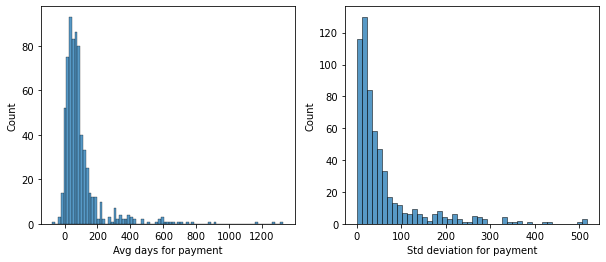

In [99]:
# Visualising the cust_seg dataframe
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(cust_seg['Avg days for payment'])

plt.subplot(1,2,2)
sns.histplot(cust_seg['Std deviation for payment'])

plt.show()

- From the above plots we can see that the data is not normalized, hence need to do scaling.

In [100]:
#importing required library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cust_seg[['Avg days for payment', 'Std deviation for payment']] = scaler.fit_transform(cust_seg[['Avg days for payment', 'Std deviation for payment']])

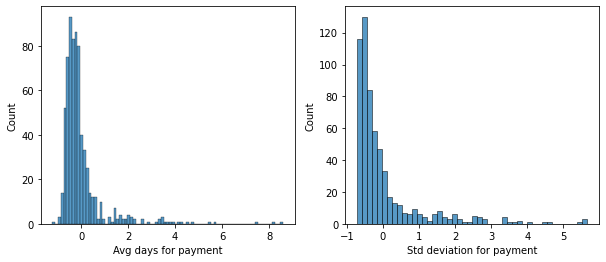

In [101]:
# Visualising the data again
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(cust_seg['Avg days for payment'])

plt.subplot(1,2,2)
sns.histplot(cust_seg['Std deviation for payment'])

plt.show()

In [102]:
# resetting the index
cust_seg.reset_index(inplace=True)

# Checking the null values if present
round(cust_seg.isna().sum()/len(cust_seg.index), 4)

CUSTOMER_NAME                0.0000
Avg days for payment         0.0000
Std deviation for payment    0.1248
dtype: float64

In [103]:
# Replacing the null values for Std deviation for payment with 0
cust_seg['Std deviation for payment'].fillna(0,inplace=True)

In [104]:
# copying the cust_seg data for clustering into new dataframe
cluster_df = cust_seg.copy()
cluster_df.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment
0,3D D Corp,-0.534622,-0.563298
1,6TH Corp,-0.420745,-0.626019
2,A3 D Corp,-0.387618,-0.075812
3,ABC Corp,-0.593378,-0.724069
4,ABDU Corp,-0.167116,-0.046989


In [105]:
#dropping customer_name for clustering
cluster_df.drop('CUSTOMER_NAME',axis=1,inplace=True)
cluster_df.head()

,Avg days for payment,Std deviation for payment
0,-0.534622,-0.563298
1,-0.420745,-0.626019
2,-0.387618,-0.075812
3,-0.593378,-0.724069
4,-0.167116,-0.046989


### Clustering

In [106]:
# Importing required libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [107]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(cluster_df)
kmeans.cluster_centers_

array([[-0.28939854, -0.32375259],
       [ 1.84753881,  3.39350051],
       [ 0.42877281,  1.0517695 ],
       [ 4.66719865,  0.44490916]])

#### Finding optimal number of clusters

In [108]:
# silhouette analysis
cluster_range = [2, 3, 4, 5, 6, 7, 8]

for cluster in cluster_range:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=cluster, max_iter=50, random_state=42)
    kmeans.fit(cluster_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(cluster_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(cluster, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7557174433618751
For n_clusters=3, the silhouette score is 0.7353053352178326
For n_clusters=4, the silhouette score is 0.6184057600926001
For n_clusters=5, the silhouette score is 0.6210748082253363
For n_clusters=6, the silhouette score is 0.4025466290529872
For n_clusters=7, the silhouette score is 0.4052604011473238
For n_clusters=8, the silhouette score is 0.41447397571622646


- From the above results, we can see that for 3 clusters, the silhouette score is decent. Hence selecting n_clusters as 3.

In [109]:
# final model with n_clusters=3
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
kmeans.fit(cluster_df)

KMeans(max_iter=50, n_clusters=3, random_state=42)

In [110]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [111]:
# Assigning labels to the cust_seg dataframe
cust_seg['cluster_id'] = kmeans.labels_
cust_seg.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment,cluster_id
0,3D D Corp,-0.534622,-0.563298,1
1,6TH Corp,-0.420745,-0.626019,1
2,A3 D Corp,-0.387618,-0.075812,1
3,ABC Corp,-0.593378,-0.724069,1
4,ABDU Corp,-0.167116,-0.046989,1


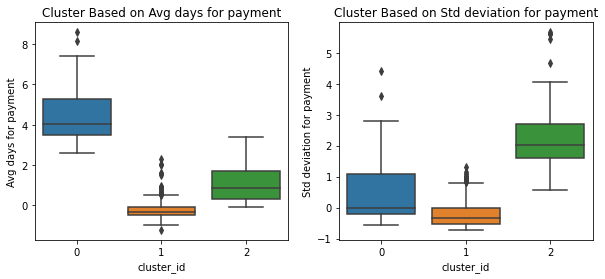

In [112]:
# Plotting box plot based on clusters
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='cluster_id', y='Avg days for payment', data=cust_seg)
plt.title("Cluster Based on Avg days for payment")


plt.subplot(1,2,2)
sns.boxplot(x='cluster_id', y='Std deviation for payment', data=cust_seg)
plt.title("Cluster Based on Std deviation for payment")
plt.show()

- '0' Cluster -- Prolonged Invoice Payment

- '1' Cluster -- Early Invoice Payment

- '2' Cluster -- Medium Invoice Payment

In [113]:
# Dropping the 'Avg days for payment' and 'Std deviation for payment' columns for merging this dataset with open invoice 
# dataset to assign cluster id to each customers
cust_seg.drop(['Avg days for payment', 'Std deviation for payment'], axis=1, inplace=True)

In [114]:
# Creating a copy
cust_dict = cust_seg.copy()

In [115]:
# Renaming the column
cust_dict.rename(columns={'CUSTOMER_NAME':'Customer_Name'}, inplace=True)
cust_dict.head()

,Customer_Name,cluster_id
0,3D D Corp,1
1,6TH Corp,1
2,A3 D Corp,1
3,ABC Corp,1
4,ABDU Corp,1


In [116]:
# Setting the 'Customer_Name' as index
cust_dict.set_index('Customer_Name')

,cluster_id
Customer_Name,
3D D Corp,1
6TH Corp,1
A3 D Corp,1
ABC Corp,1
ABDU Corp,1
...,...
YOUS Corp,1
ZAHR Corp,1
ZAIN Corp,1


Text(0.5, 1.0, 'Customer Segment Distribution Chart')

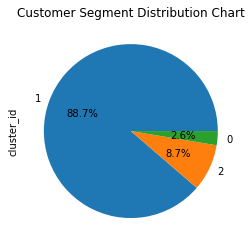

In [117]:
(cust_dict.cluster_id.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Customer Segment Distribution Chart")

Where 

- '0' Cluster -- Prolonged Invoice Payment

- '1' Cluster -- Early Invoice Payment

- '2' Cluster -- Medium Invoice Payment

-- From the above we can see that Early customers comprise of 88.7% of customers whereas medium and prolonged payers are 11.3% in total

In [118]:
# Merging rec_pay_data and cust_deg to add clustering index
merged_df = pd.merge(df_rec_pay_data, cust_seg, how='inner', on='CUSTOMER_NAME')
merged_df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,INVOICE_CURRENCY_CODE,...,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,act_days_for_pay,cluster_id
0,WIRE,C EA Corp,37403,2021-04-20,USD,101018.630400,14200000001,2020-11-02,2020-12-30,AED,...,0,0,0,0,0,0,0,1,169,1
1,WIRE,C EA Corp,37403,2021-05-19,AED,2859.090000,1.2721E+11,2021-04-07,2021-05-30,AED,...,0,0,0,0,0,0,0,1,42,1
2,WIRE,C EA Corp,37403,2021-02-20,AED,10.578625,2.412E+11,2020-11-26,2020-12-26,AED,...,0,0,0,0,0,0,0,1,86,1
3,WIRE,RADW Corp,4003,2021-01-31,SAR,48990.211330,99200000043,2020-12-29,2021-01-28,SAR,...,0,0,0,0,0,0,0,1,33,1
4,WIRE,RADW Corp,4003,2021-01-31,SAR,41991.609710,99210000003,2021-01-30,2021-03-01,SAR,...,0,0,0,0,0,0,0,1,1,1


In [119]:
# checking null values for clusters
merged_df['cluster_id'].isnull().sum()

0

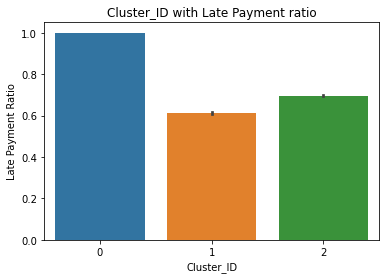

In [120]:
sns.barplot(data=merged_df, x='cluster_id', y='target', estimator=np.mean)
plt.title("Cluster_ID with Late Payment ratio")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Ratio")
plt.show()

In [121]:
merged_df.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'target', 'month_reciept', 'month_inv_creation',
       'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV',
       'act_days_for_pay', 'cluster_id'],
      dtype='object')

## Data Preparation for Model building

In [122]:
# Creating a new dataframe with important variables for model building
reg_df = merged_df[['USD Amount','INVOICE_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                    '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM', 
                    '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                    'DM', 'INV', 'cluster_id']]
reg_df.head()

,USD Amount,INVOICE_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id
0,101018.630400,2020-11-02,0,1,0,0,0,0,0,0,0,0,0,1,1
1,2859.090000,2021-04-07,0,1,0,0,0,0,0,0,0,0,0,1,1
2,10.578625,2020-11-26,0,0,1,0,0,0,0,0,0,0,0,1,1
3,48990.211330,2020-12-29,0,0,1,0,0,0,0,0,0,0,0,1,1
4,41991.609710,2021-01-30,0,0,1,0,0,0,0,0,0,0,0,1,1


In [123]:
# Creating Invoice_Month column and dropping INVOICE_CREATION_DATE
reg_df['Invoice_Month'] = reg_df['INVOICE_CREATION_DATE'].dt.month
reg_df.drop('INVOICE_CREATION_DATE',axis=1,inplace= True)
reg_df.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,Invoice_Month
0,101018.630400,0,1,0,0,0,0,0,0,0,0,0,1,1,11
1,2859.090000,0,1,0,0,0,0,0,0,0,0,0,1,1,4
2,10.578625,0,0,1,0,0,0,0,0,0,0,0,1,1,11
3,48990.211330,0,0,1,0,0,0,0,0,0,0,0,1,1,12
4,41991.609710,0,0,1,0,0,0,0,0,0,0,0,1,1,1


In [124]:
reg_df.shape

(90613, 15)

In [125]:
# Open Invoice dataset
open_reg_df = df_open_inv_data[['Due Date','USD Amount', 'INV_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                         '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
                         '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                         'DM', 'INV','AGE']]
open_reg_df.head()

,Due Date,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,AGE
1,2022-03-03,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,0,1,33
2,2022-04-23,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,-18
3,2022-01-19,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,0,1,76
4,2022-04-30,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,-25
5,2022-04-30,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,-25


In [126]:
# Creating Invoice_Month column and dropping INV_CREATION_DATE
open_reg_df['Invoice_Month'] = open_reg_df['INV_CREATION_DATE'].dt.month
open_reg_df.drop('INV_CREATION_DATE',axis=1,inplace= True)
open_reg_df.head()

,Due Date,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,AGE,Invoice_Month
1,2022-03-03,2000,0,0,1,0,0,0,0,0,0,0,0,1,33,2
2,2022-04-23,2000,0,0,1,0,0,0,0,0,0,0,0,1,-18,3
3,2022-01-19,2415,0,0,0,0,0,0,0,0,0,0,0,1,76,1
4,2022-04-30,3800,0,1,0,0,0,0,0,0,0,0,0,1,-25,3
5,2022-04-30,1264,0,1,0,0,0,0,0,0,0,0,0,1,-25,3


In [127]:
# Creating Due_Month column and dropping Due Date
open_reg_df['Due_Month'] = open_reg_df['Due Date'].dt.month
open_reg_df.drop('Due Date',axis=1,inplace= True)
open_reg_df.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,AGE,Invoice_Month,Due_Month
1,2000,0,0,1,0,0,0,0,0,0,0,0,1,33,2,3
2,2000,0,0,1,0,0,0,0,0,0,0,0,1,-18,3,4
3,2415,0,0,0,0,0,0,0,0,0,0,0,1,76,1,1
4,3800,0,1,0,0,0,0,0,0,0,0,0,1,-25,3,4
5,1264,0,1,0,0,0,0,0,0,0,0,0,1,-25,3,4


In [128]:
# Checking columns for both datasets
reg_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'cluster_id',
       'Invoice_Month'],
      dtype='object')

In [129]:
open_reg_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'AGE',
       'Invoice_Month', 'Due_Month'],
      dtype='object')

## Train- Test Split

In [130]:
# Feature variables X
X = reg_df.copy()
X.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,Invoice_Month
0,101018.630400,0,1,0,0,0,0,0,0,0,0,0,1,1,11
1,2859.090000,0,1,0,0,0,0,0,0,0,0,0,1,1,4
2,10.578625,0,0,1,0,0,0,0,0,0,0,0,1,1,11
3,48990.211330,0,0,1,0,0,0,0,0,0,0,0,1,1,12
4,41991.609710,0,0,1,0,0,0,0,0,0,0,0,1,1,1


In [131]:
# Target variable y
y = merged_df['target']
y.head()

0    1
1    0
2    1
3    1
4    0
Name: target, dtype: int32

In [132]:
# Splitting into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,Invoice_Month
4080,1.185720e+05,0,0,0,0,0,1,0,0,0,0,0,1,2,12
24221,1.113644e+06,0,0,0,0,0,0,1,0,0,0,0,1,2,11
65830,1.011572e+03,0,1,0,0,0,0,0,0,0,0,0,1,2,12
67230,5.819010e+03,0,0,0,0,0,0,1,0,0,0,0,1,1,12
27463,1.253072e+05,0,0,0,0,0,1,0,0,0,0,0,1,2,11


## Feature Scaling

In [133]:
X_train.shape

(63429, 15)

In [134]:
# Feature scaling for USD amount
scaler = StandardScaler()
X_train['USD Amount'] = scaler.fit_transform(X_train[['USD Amount']])
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,Invoice_Month
4080,-0.467332,0,0,0,0,0,1,0,0,0,0,0,1,2,12
24221,0.933437,0,0,0,0,0,0,1,0,0,0,0,1,2,11
65830,-0.632822,0,1,0,0,0,0,0,0,0,0,0,1,2,12
67230,-0.626055,0,0,0,0,0,0,1,0,0,0,0,1,1,12
27463,-0.457851,0,0,0,0,0,1,0,0,0,0,0,1,2,11


In [135]:
X_train.describe()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,Invoice_Month
count,6.342900e+04,63429.000000,63429.000000,63429.000000,63429.000000,63429.000000,63429.000000,63429.000000,63429.000000,63429.000000,63429.000000,63429.000000,63429.000000,63429.000000,63429.000000
mean,-8.191240e-17,0.082722,0.124564,0.156269,0.041952,0.039335,0.132305,0.206893,0.042977,0.024358,0.106812,0.006164,0.940595,1.513409,5.458260
std,1.000008e+00,0.275464,0.330227,0.363113,0.200482,0.194393,0.338825,0.405081,0.202807,0.154159,0.308877,0.078272,0.236383,0.503658,4.080624
min,-6.342432e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-5.797839e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,-3.887278e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,4.000000
75%,1.965004e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,10.000000
max,7.224333e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,12.000000


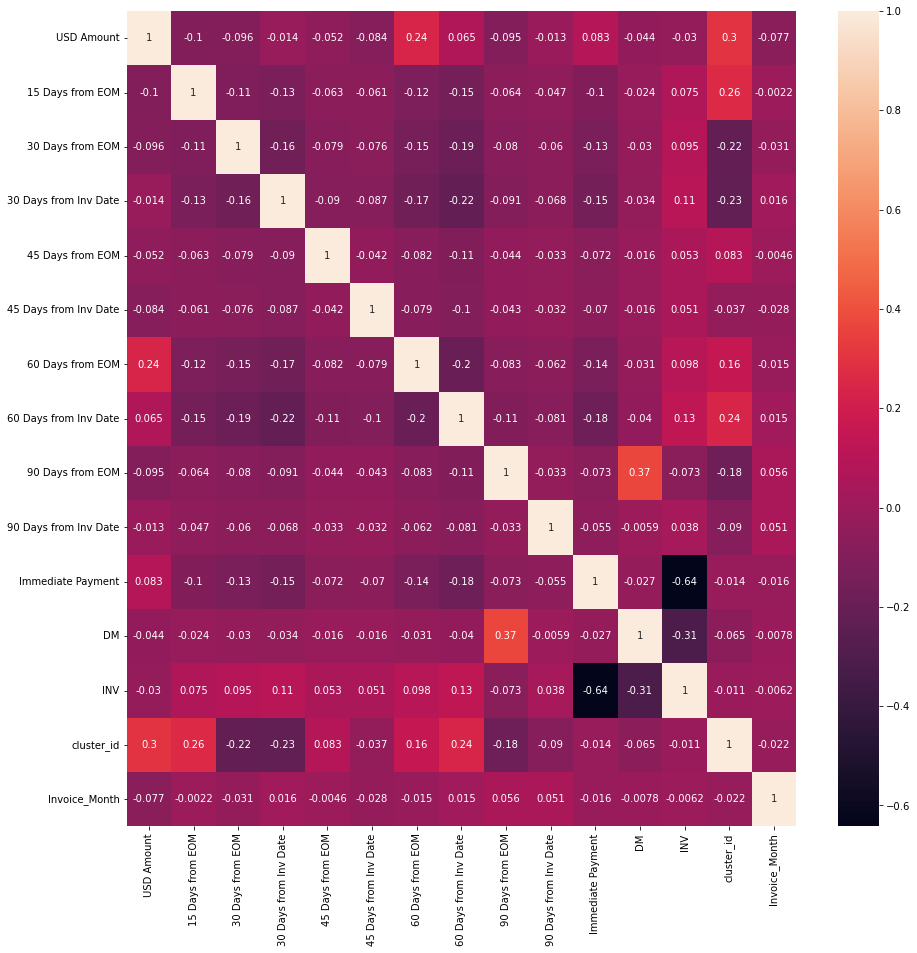

In [136]:
# Plotting heat map of X_train dataset
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

- INV & Immediate Payment has high multicollinearity, dropping INV

In [137]:
X_train.drop(['INV'], axis=1, inplace=True)
X_test.drop(['INV'], axis=1, inplace=True)

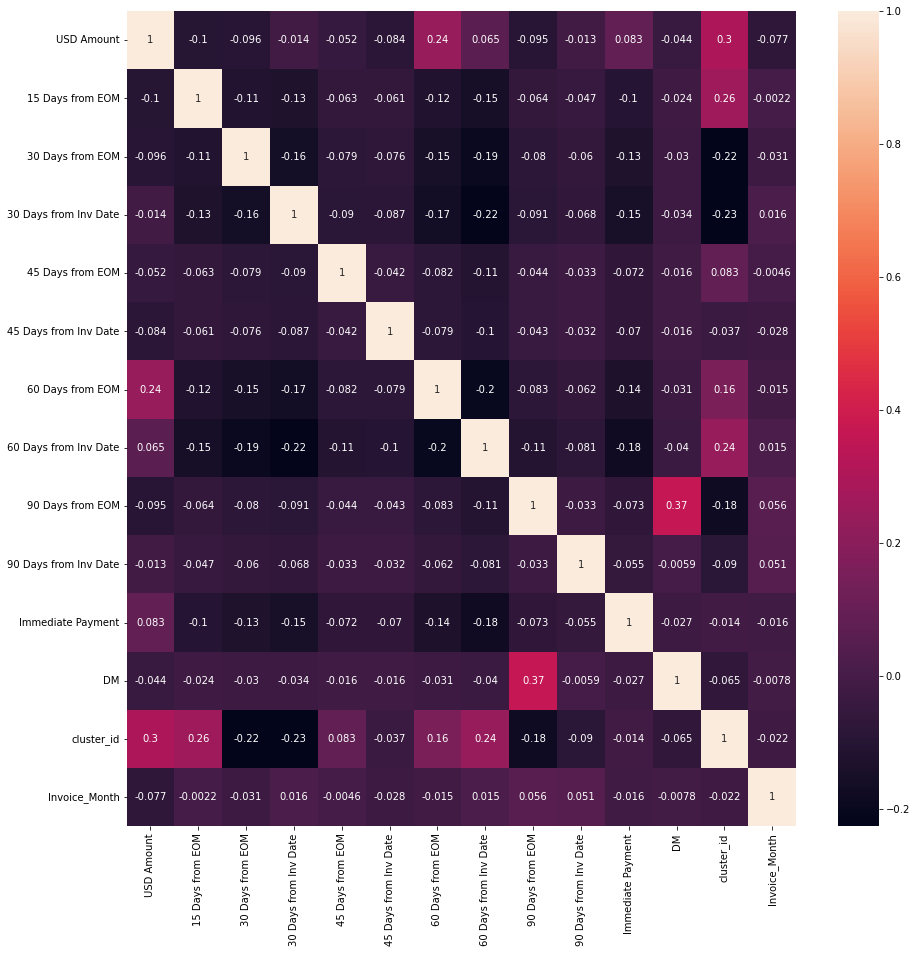

In [138]:
# Plotting heat map of X_train dataset again
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

- Now the data has no high multicollinearity. Going ahead with model building

## Model Building

## Logistic Regression

In [139]:
# Importing required library for building logistic regression model
import statsmodels.api as sm

### 1st Model

In [140]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                63429
Model:                            GLM   Df Residuals:                    63414
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29814.
Date:                Fri, 29 Sep 2023   Deviance:                       59629.
Time:                        22:28:16   Pearson chi2:                 6.20e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2938
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1369      0.056      2.435      0.015       0.027       0.247
USD Amount               -0.1660      0.012    -13.915      0.000      -0.189      -0.143
15 Days from EOM          2.4189      0.102     23.805      0.000       2.220       2.618
30 Days from EOM         -2.2342      0.053    -42.553      0.000      -2.337      -2.131
30 Days from Inv Date     0.2668      0.052      5.160      0.000       0.165       0.368
45 Days from EOM          0.3763      0.069      5.429      0.000       0.240       0.512
45 Days from Inv Date    -0.3319      0.063     -5.287      0.000      -0.455      -0.209
60 Days from EOM         -2.1034      0.053    -39.353      0.000      -2.208      -1.999
60 Days from Inv Date    -0.2794      0.051     -5.520      0.000      -0.379      -0.180
90 Days from EOM         -0.6522      0.063    -10.363      0.000      -0.775      -0.529
90 Days from Inv Date    -0.9428      0.069    -13.581      0.000      -1.079      -0.807
Immediate Payment         3.0095      0.102     29.464      0.000       2.809       3.210
DM                        1.5963      0.159     10.037      0.000       1.285       1.908
cluster_id                0.3223      0.024     13.378      0.000       0.275       0.370
Invoice_Month             0.0936      0.003     36.687      0.000       0.089       0.099
=========================================================================================
"""

#### Checking VIF

In [141]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cluster_id,10.68
7,60 Days from Inv Date,3.73
13,Invoice_Month,2.72
6,60 Days from EOM,2.65
1,15 Days from EOM,2.39
3,30 Days from Inv Date,2.16
10,Immediate Payment,2.04
2,30 Days from EOM,1.89
4,45 Days from EOM,1.55
8,90 Days from EOM,1.47


Dropping '60 Days from Inv Date' and build the model again

In [142]:
X_train.drop(['60 Days from Inv Date'], axis=1, inplace=True)
X_test.drop(['60 Days from Inv Date'], axis=1, inplace=True)

## 2nd Model

In [143]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                63429
Model:                            GLM   Df Residuals:                    63415
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29830.
Date:                Fri, 29 Sep 2023   Deviance:                       59660.
Time:                        22:28:17   Pearson chi2:                 6.21e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2935
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0491      0.044     -1.105      0.269      -0.136       0.038
USD Amount               -0.1716      0.012    -14.412      0.000      -0.195      -0.148
15 Days from EOM          2.6575      0.092     28.947      0.000       2.478       2.837
30 Days from EOM         -2.0138      0.034    -60.092      0.000      -2.079      -1.948
30 Days from Inv Date     0.4883      0.032     15.238      0.000       0.425       0.551
45 Days from EOM          0.6088      0.055     11.117      0.000       0.501       0.716
45 Days from Inv Date    -0.1085      0.048     -2.281      0.023      -0.202      -0.015
60 Days from EOM         -1.8659      0.031    -59.759      0.000      -1.927      -1.805
90 Days from EOM         -0.4367      0.049     -8.925      0.000      -0.533      -0.341
90 Days from Inv Date    -0.7215      0.056    -12.812      0.000      -0.832      -0.611
Immediate Payment         3.2410      0.093     34.844      0.000       3.059       3.423
DM                        1.5941      0.159     10.025      0.000       1.282       1.906
cluster_id                0.2951      0.024     12.523      0.000       0.249       0.341
Invoice_Month             0.0932      0.003     36.536      0.000       0.088       0.098
=========================================================================================
"""

#### Checking VIF

In [144]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,cluster_id,3.96
12,Invoice_Month,2.60
6,60 Days from EOM,1.47
1,15 Days from EOM,1.39
3,30 Days from Inv Date,1.33
9,Immediate Payment,1.28
7,90 Days from EOM,1.27
2,30 Days from EOM,1.26
10,DM,1.16
0,USD Amount,1.15


In [145]:
# Predicted values for train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

4080     0.468522
24221    0.803179
65830    0.438933
67230    0.813358
27463    0.444994
83397    0.979485
32561    0.983195
64866    0.232476
32027    0.766210
34144    0.670133
dtype: float64

In [146]:
# Reshaping the array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.46852187, 0.80317904, 0.43893252, 0.81335832, 0.44499436,
       0.97948544, 0.9831953 , 0.23247602, 0.76621036, 0.67013334])

In [147]:
# Creating a dataframe for predicted values
y_pred = pd.DataFrame({'target':y_train.values, 'target_pred':y_train_pred})
y_pred.head()

,target,target_pred
0,0,0.468522
1,0,0.803179
2,1,0.438933
3,0,0.813358
4,0,0.444994


<b>Creating a new column 'final_pred' if 'target_pred' > 0.5</b>

In [148]:
# Making the prediction based on 0.5 cutoff
y_pred['logreg_pred'] = y_pred['target_pred'].map(lambda x:1 if x>0.5 else 0) 
y_pred.head()

,target,target_pred,logreg_pred
0,0,0.468522,0
1,0,0.803179,1
2,1,0.438933,0
3,0,0.813358,1
4,0,0.444994,0


In [149]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from statsmodels.tools.tools import add_constant

In [153]:
# Confusion Matrix
confusion = confusion_matrix(y_pred.target, y_pred.logreg_pred)
confusion

array([[12420,  9432],
       [ 4844, 36733]], dtype=int64)

In [154]:
# Accuracy
print(accuracy_score(y_pred.target, y_pred.logreg_pred))

0.7749294486748963


- We have 77.4% accuracy for our train data set.

In [155]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [156]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
sensitivity

0.8834932775332516

In [157]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.5683690280065898

In [158]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.4316309719934102


In [159]:
# positive predictive value 
print (TP / float(TP+FP))

0.795689375067692


In [160]:
# Negative predictive value
print (TN / float(TN+ FN))

0.719416126042632


### Finding the optimal cutoff point

In [163]:
# Trying out multiple threshold values
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    y_pred[f'y_pred_{i}'] = y_pred['target_pred'].apply(lambda x : 1 if x > i else 0)
y_pred

,target,target_pred,logreg_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9
0,0,0.468522,0,1,1,1,1,0,0,0,0,0
1,0,0.803179,1,1,1,1,1,1,1,1,1,0
2,1,0.438933,0,1,1,1,1,0,0,0,0,0
3,0,0.813358,1,1,1,1,1,1,1,1,1,0
4,0,0.444994,0,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
63424,1,0.987912,1,1,1,1,1,1,1,1,1,1
63425,0,0.726716,1,1,1,1,1,1,1,1,0,0
63426,0,0.737747,1,1,1,1,1,1,1,1,0,0
63427,1,0.185011,0,1,0,0,0,0,0,0,0,0


In [164]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_pred.target, y_pred[f'y_pred_{i}'])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.655426  0.999904  0.000000
0.2   0.2  0.700705  0.979748  0.169779
0.3   0.3  0.770531  0.947760  0.433324
0.4   0.4  0.770941  0.911417  0.503661
0.5   0.5  0.774929  0.883493  0.568369
0.6   0.6  0.776806  0.866200  0.606718
0.7   0.7  0.710763  0.667100  0.793840
0.8   0.8  0.640433  0.493735  0.919550
0.9   0.9  0.538161  0.302836  0.985905


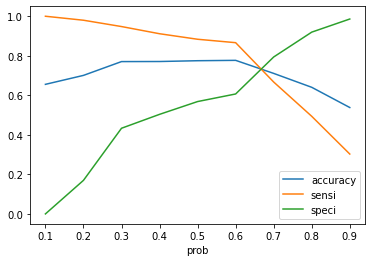

In [165]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the curve above, 0.6 is the optimum point to take it as a cutoff probability.

In [168]:
# Creating a column based on 0.6 cutoff for prediction
y_pred['final_predicted'] = y_pred.target_pred.map( lambda x: 1 if x > 0.6 else 0)

y_pred.head()

,target,target_pred,logreg_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9,final_predicted
0,0,0.468522,0,1,1,1,1,0,0,0,0,0,0
1,0,0.803179,1,1,1,1,1,1,1,1,1,0,1
2,1,0.438933,0,1,1,1,1,0,0,0,0,0,0
3,0,0.813358,1,1,1,1,1,1,1,1,1,0,1
4,0,0.444994,0,1,1,1,1,0,0,0,0,0,0


In [169]:
# Let's check the overall accuracy.
accuracy_score(y_pred.target, y_pred.final_predicted)

0.7768055621245802

In [171]:
# Precision Score
precision_score(y_pred.target, y_pred.final_predicted)

0.8073439741750359

In [172]:
# Recall Score
recall_score(y_pred.target, y_pred.final_predicted)

0.8662000625345744

In [173]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_pred.target, y_pred.target_pred)

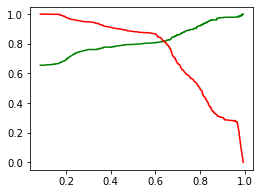

In [174]:
plt.figure(figsize=(4,3))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- On Precision & Recall trade off we found optimal cutoff of between 0.6 & 0.7 . Hence keeping the optimal cutoff 0.6.

### Plotting the ROC curve

In [175]:
from sklearn.metrics import roc_auc_score,roc_curve

In [176]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [177]:
fpr, tpr, thresholds = roc_curve(y_pred.target,y_pred.target_pred,drop_intermediate = False)

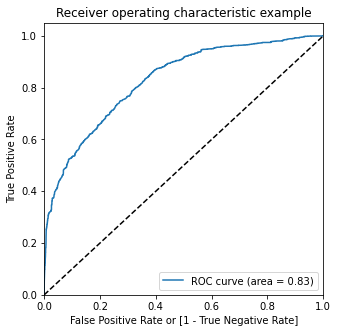

In [178]:
draw_roc(y_pred.target,y_pred.target_pred)

- AUC = 0.83 which shows the model is good.

### Making predictions on the test set

In [179]:
# Transforming the numerical column of test set
X_test[['USD Amount']]= scaler.transform(X_test[['USD Amount']])
X_test.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,cluster_id,Invoice_Month
3502,-0.118507,0,0,0,1,0,0,0,0,0,0,2,3
17808,0.073170,0,0,0,0,0,0,0,0,0,0,2,12
17149,0.044642,0,0,0,0,0,1,0,0,0,0,2,3
49271,1.090178,0,0,1,0,0,0,0,0,0,0,1,9
26847,0.259517,0,0,0,0,0,0,0,0,0,0,2,2


In [180]:
# Adding a constant
X_test_sm = sm.add_constant(X_test)

In [181]:
#Making predictions on the test set

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3502     0.809985
17808    0.838500
17149    0.258683
49271    0.799977
26847    0.664415
53766    0.726728
87211    0.771337
70964    0.506941
65145    0.977461
68856    0.841084
dtype: float64

In [182]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [183]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [184]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [193]:
y_test_df.head()

,target,CustID
0,1,3502
1,1,17808
2,0,17149
3,1,49271
4,1,26847


In [194]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [195]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [201]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Delay_Prob'})

In [202]:
# Let's see the head of y_pred_final
y_pred_final.head()

,target,CustID,Delay_Prob,final_predicted
0,1,3502,0.809985,1
1,1,17808,0.838500,1
2,0,17149,0.258683,0
3,1,49271,0.799977,1
4,1,26847,0.664415,1


In [203]:
# Creating final prediction on test set based on 0.6 cutoff
y_pred_final['final_predicted'] = y_pred_final.Delay_Prob.map(lambda x: 1 if x >= 0.6 else 0)

In [205]:
# Let's check the overall accuracy.
accuracy_score(y_pred_final.target, y_pred_final.final_predicted)

0.7813787522071807

In [206]:
#precision score
precision_score(y_pred_final.target, y_pred_final.final_predicted)

0.8115874009178139

In [207]:
# Recall Score
recall_score(y_pred.target, y_pred.final_predicted)

0.8662000625345744

- Our train and test accuracy is almost same around 77-78 %

## Random Forest

In [209]:
# importing necessary libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [210]:
reg_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'cluster_id',
       'Invoice_Month'],
      dtype='object')

In [211]:
# creating X and y
X= reg_df
y= merged_df['target']

In [212]:
# Splitting into train and test set
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)

In [213]:
# Building a base random forest model to check the accuracy

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [214]:
# predicted values
y_train_pred_rf = rf.predict(X_train_rf)

In [215]:
# Checking accuracy and classification report
accuracy = accuracy_score(y_train_rf, y_train_pred_rf)
print(classification_report(y_train_rf, y_train_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     21852
           1       0.95      0.98      0.97     41577

    accuracy                           0.96     63429
   macro avg       0.96      0.95      0.95     63429
weighted avg       0.96      0.96      0.96     63429

Accuracy is :  0.9578110958709738


In [216]:
# Using cross validation to check if our model is overfitting

rf_cv = RandomForestClassifier(random_state=42)

# Compute cross-validation scores on the training data
scores = cross_val_score(rf_cv, X_train_rf, y_train_rf, cv=5, scoring= 'recall')

# Compute the mean and standard deviation of the cross-validation scores
mean_score = scores.mean()
std_score = scores.std()

# Print the mean and standard deviation of the cross-validation scores
print("Mean score:", mean_score)
print("Standard deviation:", std_score)

Mean score: 0.9521611152038091
Standard deviation: 0.003205708214760998


In [217]:
# Creating y_pred for test data
y_test_pred_rf = rf.predict(X_test_rf)

In [218]:
# Checking accuracy and classification report of test data
accuracy = accuracy_score(y_test_rf, y_test_pred_rf)
print(classification_report(y_test_rf, y_test_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      9291
           1       0.93      0.96      0.94     17893

    accuracy                           0.93     27184
   macro avg       0.92      0.91      0.92     27184
weighted avg       0.93      0.93      0.93     27184

Accuracy is :  0.9258387286639199


#### Hyperparameter Tuning

In [219]:
#Using Grid search for hyper-parameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid=param_grid, scoring='f1', cv=5, n_jobs= -1)

grid_search.fit(X_train_rf, y_train_rf)

# Best Hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best f1 score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_cv_rf = best_rf.predict(X_train_rf)

print(classification_report(y_train_rf, y_pred_cv_rf))

Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best f1 score: 0.9376068440470815
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     21852
           1       0.95      0.98      0.97     41577

    accuracy                           0.96     63429
   macro avg       0.96      0.95      0.95     63429
weighted avg       0.96      0.96      0.96     63429



In [220]:
# Test set (testing)

y_pred_test_cv = best_rf.predict(X_test_rf)

print(classification_report(y_test_rf,y_pred_test_cv))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      9291
           1       0.93      0.96      0.94     17893

    accuracy                           0.93     27184
   macro avg       0.92      0.91      0.92     27184
weighted avg       0.93      0.93      0.93     27184



- From the above classification report, it can be seen that the f1-score for train and test set is 0.96 and 0.93, which implies that this is a good model. Hence moving forward with this as final model for prediction.

#### Checking feature importance

In [222]:
importance = best_rf.feature_importances_
sorted_idx = importance.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. {X.columns[idx]} ({importance[idx]:.3f})")

Feature ranking:
1. USD Amount (0.478)
2. Invoice_Month (0.134)
3. 30 Days from EOM (0.106)
4. 60 Days from EOM (0.100)
5. cluster_id (0.052)
6. Immediate Payment (0.041)
7. 15 Days from EOM (0.031)
8. 30 Days from Inv Date (0.014)
9. 60 Days from Inv Date (0.011)
10. INV (0.009)
11. 90 Days from Inv Date (0.007)
12. 90 Days from EOM (0.006)
13. 45 Days from EOM (0.006)
14. 45 Days from Inv Date (0.004)
15. DM (0.001)


## Preparing Open Invoice dataset for prediction

The open invoice data has a column 'AGE' which is calculated by taking the difference between Transaction Date and AS_OF_DATE. A positive value in the AGE column clearly indicates that the payment is already overdue. So, there is nothing to predict. But, a negative value in the AGE column means that the due date is yet to be crossed. Hence, the model should be able to predict whether the payment will be delayed or not only for those customers whose AGE value is negative.

In [225]:
# Selecting rows with negative age value for prediction
open_reg_df_age = df_open_inv_data[df_open_inv_data['AGE'] < 0]
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1
6,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1
7,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1


In [226]:
open_reg_df_age = pd.merge(open_reg_df_age, cust_dict, how='left', on='Customer_Name')

In [227]:
# Null counts
round(open_reg_df_age.isnull().sum()/len(open_reg_df_age.index), 4)

Customer_Name            0.0000
Due Date                 0.0000
AGE                      0.0000
USD Amount               0.0000
INV_CREATION_DATE        0.0000
15 Days from EOM         0.0000
30 Days from EOM         0.0000
30 Days from Inv Date    0.0000
45 Days from EOM         0.0000
45 Days from Inv Date    0.0000
60 Days from EOM         0.0000
60 Days from Inv Date    0.0000
90 Days from EOM         0.0000
90 Days from Inv Date    0.0000
Immediate Payment        0.0000
DM                       0.0000
INV                      0.0000
cluster_id               0.0274
dtype: float64

- cluster_id has 2.7 % null value counts, hence removing the null values for better model prediction as these null values are of new customers whose data is not present in the 'Received Payment data'.

In [228]:
# Dropping the rows containing null values
open_reg_df_age.dropna(axis=0, inplace=True)

In [229]:
open_reg_df_age.shape

(27247, 18)

In [230]:
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,1.0
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,1.0
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,1.0
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,1.0
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,1.0


In [231]:
open_reg_df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 0 to 28014
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer_Name          27247 non-null  object        
 1   Due Date               27247 non-null  datetime64[ns]
 2   AGE                    27247 non-null  int64         
 3   USD Amount             27247 non-null  int32         
 4   INV_CREATION_DATE      27247 non-null  datetime64[ns]
 5   15 Days from EOM       27247 non-null  uint8         
 6   30 Days from EOM       27247 non-null  uint8         
 7   30 Days from Inv Date  27247 non-null  uint8         
 8   45 Days from EOM       27247 non-null  uint8         
 9   45 Days from Inv Date  27247 non-null  uint8         
 10  60 Days from EOM       27247 non-null  uint8         
 11  60 Days from Inv Date  27247 non-null  uint8         
 12  90 Days from EOM       27247 non-null  uint8         
 13  9

In [232]:
# converting the cluster_id column to int
open_reg_df_age['cluster_id'] = open_reg_df_age['cluster_id'].astype('Int64')

In [233]:
# Checking the head after adding 'cluster_id' column
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,1
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,1
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,1
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,1
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,1


In [234]:
# Creating a copy of open_reg_df_age for final prediction
open_reg_df_final = open_reg_df_age.copy()

In [235]:
# Dropping Customer_Name and AGE column
open_reg_df_final.drop(['Customer_Name', 'AGE'], axis=1, inplace=True)

In [236]:
open_reg_df_final['Invoice_Month'] = open_reg_df_final['INV_CREATION_DATE'].dt.month # Extracting Month

In [237]:
# dropping due_date and invoice creation date

open_reg_df_final.drop(['Due Date','INV_CREATION_DATE'], axis= 1, inplace= True)

In [238]:
# Checking the columns in the dataset
open_reg_df_final.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'cluster_id',
       'Invoice_Month'],
      dtype='object')

## Final Prediction based on Random Forest model

In [240]:
# getting predictions on open invoices

y_open_invoices= best_rf.predict_proba(open_reg_df_final)[:,1]

y_open_invoices

array([0.99808499, 0.91555556, 0.83266178, ..., 0.21901751, 0.77181303,
       0.01856164])

In [241]:
# Adding the predicted values to the dataframe
open_reg_df_age['Pred_rf'] = y_open_invoices
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,Pred_rf
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,1,0.998085
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,1,0.915556
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,1,0.832662
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,1,0.013333
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,1,1.000000


In [242]:
# Customer-wise model prediction
customer_seg_prob= pd.DataFrame(open_reg_df_age.groupby('Customer_Name').prod()['Pred_rf'].round(4))
customer_seg_prob

,Pred_rf
Customer_Name,
3D D Corp,0.0000
6TH Corp,0.1960
ABDU Corp,0.0000
ABEE Corp,0.1965
ABU Corp,0.0115
...,...
XPRE Corp,0.0000
YOUG Corp,0.2591
YOUS Corp,0.0000


In [243]:
# Taking 0.6 as cut off value
open_reg_df_age['Final_Prediction'] = open_reg_df_age.Pred_rf.map(lambda x: 1 if x>0.6 else 0)

In [244]:
# Let us check our final dataframe with predictions
open_reg_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,cluster_id,Pred_rf,Final_Prediction
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,0,1,1,0.998085,1
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,1,0.915556,1
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,0,1,1,0.832662,1
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,1,0.013333,0
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,0,1,1,1.000000,1


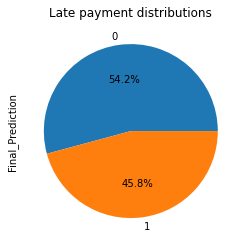

In [245]:
(open_reg_df_age.Final_Prediction.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Late payment distributions")
plt.show()

#### From the above pie chart, we can observe that 54.2% payments in the open invoice data with AGE value negative(indicating due date not crossed)

### Summary of prediction on Customers_name

In [247]:
# Checking Customers with our target variable_delayed
Delay_payment = open_reg_df_age.groupby(['Customer_Name'])['Final_Prediction'].sum()
Delay_payment = Delay_payment.to_frame()
Delay_payment = Delay_payment.sort_values(by ='Final_Prediction',ascending=False)

In [248]:
# Checking Customers for total invoice counts
Delay_payment_total = open_reg_df_age.groupby(['Customer_Name'])['Final_Prediction'].count() # total payments by each customers
Delay_payment_total = Delay_payment_total.to_frame()
Delay_payment_total = Delay_payment_total.sort_values(by ='Final_Prediction',ascending=False)

In [249]:
# Merging both dataframes based on Customer_name
Merge_df=pd.merge(Delay_payment,Delay_payment_total,how='inner',on='Customer_Name')

In [250]:
# Renaming the columns
Merge_df.columns=["Delayed_Payment","Total_Payments"]

In [251]:
# Creating a column for delay percentage of each customers
Merge_df['Delay%']=np.round(Merge_df['Delayed_Payment']/Merge_df['Total_Payments']*100,2)

In [252]:
# Checking Merge_df 
Merge_df.sort_values('Total_Payments',ascending=False)

,Delayed_Payment,Total_Payments,Delay%
Customer_Name,,,
SEPH Corp,4045,8260,48.97
FITR Corp,1054,3454,30.52
PARF Corp,1022,1717,59.52
AREE Corp,725,1117,64.91
ALLI Corp,338,1042,32.44
...,...,...,...
ATYA Corp,1,1,100.00
ARCO Corp,1,1,100.00
ALRA Corp,1,1,100.00


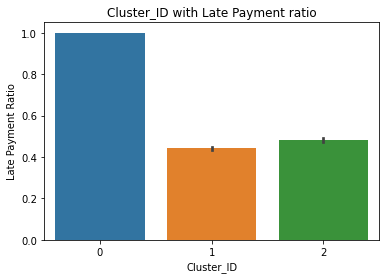

In [254]:
sns.barplot(data=open_reg_df_age, x='cluster_id', y='Final_Prediction', estimator=np.mean)
plt.title("Cluster_ID with Late Payment ratio")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Ratio")
plt.show()
#cluster ID 1 has significantly higher ratio of default than clusters 0 and 2

In [255]:
Merge_df.sort_values(['Delay%','Total_Payments','Delayed_Payment'],ascending=[False,False,False]).head(10) # top 10 customers with highest delay rates

,Delayed_Payment,Total_Payments,Delay%
Customer_Name,,,
NUDE Corp,7,7,100.0
ALSU Corp,7,7,100.0
LVMH Corp,4,4,100.0
TRAF Corp,3,3,100.0
MUOS Corp,3,3,100.0
DAEM Corp,3,3,100.0
ROVE Corp,3,3,100.0
CITY Corp,3,3,100.0
ALBU Corp,3,3,100.0
